
--- This is a regression problem ---

1. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

 --- treelet kernel matrix of size 183 built in 0.47826528549194336 seconds ---

gram matrix with parameters {} is: 
[[4.00000000e+00 2.60653066e+00 1.00000000e+00 ... 1.26641655e-14
  1.26641655e-14 1.26641655e-14]
 [2.60653066e+00 6.00000000e+00 1.00000000e+00 ... 1.26641655e-14
  1.26641655e-14 1.26641655e-14]
 [1.00000000e+00 1.00000000e+00 4.00000000e+00 ... 3.00000000e+00
  3.00000000e+00 3.00000000e+00]
 ...
 [1.26641655e-14 1.26641655e-14 3.00000000e+00 ... 1.80000000e+01
  1.30548713e+01 8.19020657e+00]
 [1.26641655e-14 1.26641655e-14 3.00000000e+00 ... 1.30548713e+01
  2.20000000e+01 9.71901120e+00]
 [1.26641655e-14 1.26641655e-14 3.00000000e+00 ... 8.19020657e+00
  9.71901120e+00 1.60000000e+01]]


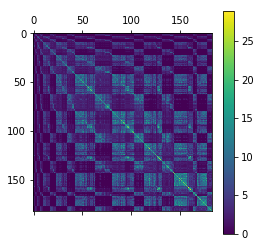


3. Fitting and predicting using nested cross validation. This could really take a while...
calculate performance:   0%|          | 1/630 [00:00<01:12,  8.65it/s]

/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


                                                                        
4. Getting final performances...

best_params_out:  [{}]
best_params_in:  [{'alpha': 1.584893192461114}]

best_val_perf:  14.495962226690725
best_val_std:  1.231113106094586
final_performance:  14.486961234514974
final_confidence:  3.0828755678322097
train_performance:  7.445811458092056
train_std:  0.44699023975297714

time to calculate gram matrix with different hyperpapams: 0.48±nan
time to calculate best gram matrix:  0.47826528549194336 s

params                 train_perf    valid_perf     test_perf         gram_matrix_time
---------------------  ------------  -------------  --------------  ------------------
{'alpha': '1.00e-01'}  80.89±188.06  270.73±507.22  566.39±2186.33                0.48
{'alpha': '1.26e-01'}  42.51±97.80   163.73±364.07  140.89±312.95                 0.48
{'alpha': '1.58e-01'}  16.53±11.13   59.49±49.03    63.71±64.12                   0.48
{'alpha': '2.00e-01'}  24.75±39.36   113.35

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


calculate performance: 100%|██████████| 630/630 [01:10<00:00, 11.33it/s]

In [1]:
%load_ext line_profiler
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.model_selection_precomputed import model_selection_for_precomputed_kernel
from pygraph.kernels.treeletKernel import treeletkernel

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
estimator = treeletkernel
param_grid_precomputed = {}
param_grid = {'alpha': np.logspace(-1, 1, num = 21, base = 10)}

model_selection_for_precomputed_kernel(datafile, estimator, param_grid_precomputed, param_grid, 
                                       'regression', NUM_TRIALS=30)

In [1]:
%load_ext line_profiler

import sys
sys.path.insert(0, "../")
from pygraph.utils.utils import kernel_train_test
from pygraph.kernels.treeletKernel import treeletkernel

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
kernel_file_path = 'kernelmatrices_path_acyclic/'

kernel_para = dict(node_label = 'atom', edge_label = 'bond_type', labeled = True)

kernel_train_test(datafile, kernel_file_path, treeletkernel, kernel_para, normalize = False)

# %lprun -f treeletkernel \
#     kernel_train_test(datafile, kernel_file_path, treeletkernel, kernel_para, normalize = False)


 --- This is a regression problem ---


 Loading dataset from file...

 Calculating kernel matrix, this could take a while...

 --- treelet kernel matrix of size 185 built in 0.47543811798095703 seconds ---
[[4.00000000e+00 2.60653066e+00 1.00000000e+00 ... 1.26641655e-14
  1.26641655e-14 1.26641655e-14]
 [2.60653066e+00 6.00000000e+00 1.00000000e+00 ... 1.26641655e-14
  1.26641655e-14 1.26641655e-14]
 [1.00000000e+00 1.00000000e+00 4.00000000e+00 ... 3.00000000e+00
  3.00000000e+00 3.00000000e+00]
 ...
 [1.26641655e-14 1.26641655e-14 3.00000000e+00 ... 1.80000000e+01
  1.30548713e+01 8.19020657e+00]
 [1.26641655e-14 1.26641655e-14 3.00000000e+00 ... 1.30548713e+01
  2.20000000e+01 9.71901120e+00]
 [1.26641655e-14 1.26641655e-14 3.00000000e+00 ... 8.19020657e+00
  9.71901120e+00 1.60000000e+01]]

 Starting calculate accuracy/rmse...
calculate performance:  98%|█████████▊| 983/1000 [00:01<00:00, 796.45it/s]
 Mean performance on train set: 2.688029
With standard deviation: 1.541623

 Me

In [ ]:
# results

# with y normalization
  RMSE_test    std_test    RMSE_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
     8.3079     3.37838       2.90887       1.2679   0.500302

# without y normalization
  RMSE_test    std_test    RMSE_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    10.0997     5.03584       2.68803      1.54162   0.484171

    

# G0 -> WL subtree h = 0
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    13.9223     2.88611        13.373     0.653301  0.186731

# G0 U G1 U G6 U G8 U G13 -> WL subtree h = 1
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    8.97706     2.90771        6.7343      1.17505  0.223171
    
# all patterns \ { G3 U G4 U G5 U G10 }  -> WL subtree h = 2    
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    7.31274     1.96289       3.73909     0.406267  0.294902

# all patterns \ { G4 U G5 }  -> WL subtree h = 3
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    8.39977     2.78309        3.8606      1.58686  0.348912

# all patterns \ { G5 }    
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    9.47647     4.22113       3.18029       1.5669  0.423638
    
    
    
# G0, -> WL subtree h = 0
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    13.9223     2.88611        13.373     0.653301  0.186731  
    
# G0 U G1 U G2 U G6 U G8 U G13 -> WL subtree h = 1
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    8.62431     2.54327       5.63422     0.255002  0.290797
    
# all patterns \ { G5 U G10 }  -> WL subtree h = 2
  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    10.1294     3.50275       3.69664      1.55116  0.418498

{0: 'C', 1: 'C', 2: 'C', 3: 'C', 4: 'C', 5: 'O', 6: 'O'}


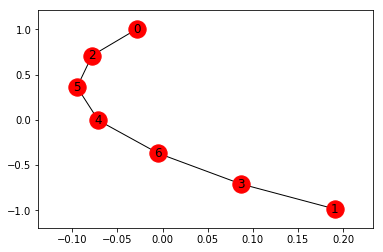

{0: 'C', 1: 'C', 2: 'C', 3: 'C', 4: 'C', 5: 'C', 6: 'O', 7: 'O'}


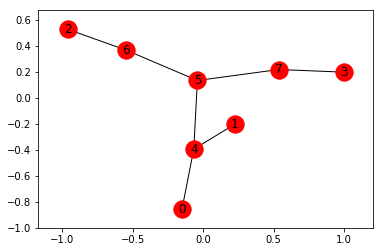


 pattern 0:  [0, 1, 2, 3, 4, 5, 6, 7]
 treelet 0:  ['C', 'C', 'C', 'C', 'C', 'C', 'O', 'O']

 pattern 1 :  [[4, 0], [4, 1], [5, 4], [6, 2], [6, 5], [7, 3], [7, 5]]
 treelet 1 :  ['1C1C', '1C1C', '1C1C', '1C1O', '1C1O', '1C1O', '1C1O']

 pattern 2 :  [[1, 4, 0], [5, 4, 0], [5, 4, 1], [5, 6, 2], [5, 7, 3], [6, 5, 4], [7, 5, 4], [7, 5, 6]]
 treelet 2 :  ['2C1C1C', '2C1C1C', '2C1C1C', '2C1O1C', '2C1O1C', '2C1C1O', '2C1C1O', '2O1C1O']

 pattern 3 :  [[4, 5, 6, 2], [4, 5, 7, 3], [6, 5, 4, 0], [6, 5, 4, 1], [6, 5, 7, 3], [7, 5, 4, 0], [7, 5, 4, 1], [7, 5, 6, 2]]
 treelet 3 :  ['3C1C1O1C', '3C1C1O1C', '3C1C1C1O', '3C1C1C1O', '3C1O1C1O', '3C1C1C1O', '3C1C1C1O', '3C1O1C1O']

 pattern 4 :  [[2, 6, 5, 4, 0], [2, 6, 5, 4, 1], [3, 7, 5, 4, 0], [3, 7, 5, 4, 1], [3, 7, 5, 6, 2]]
 treelet 4 :  ['4C1C1C1O1C', '4C1C1C1O1C', '4C1C1C1O1C', '4C1C1C1O1C', '4C1O1C1O1C']

 pattern 5 :  []
 treelet 5 :  []

 pattern 3 star:  [[4, 0, 1, 5], [5, 4, 6, 7]]
 treelet 3 star:  ['6CC1C1C1', '6CC1O1O1']

 pattern 4 st

In [3]:
import sys
import pathlib
from collections import Counter
from itertools import chain
sys.path.insert(0, "../")

import networkx as nx
import numpy as np
import time

from sklearn.metrics.pairwise import rbf_kernel, paired_distances
import matplotlib.pyplot as plt

# main
import sys
from collections import Counter
import networkx as nx
sys.path.insert(0, "../")
from pygraph.utils.graphfiles import loadDataset


def main(): 
    dataset, y = loadDataset("../../../../datasets/acyclic/Acyclic/dataset_bps.ds")
    G1 = dataset[15]
    print(nx.get_node_attributes(G1, 'label'))
    nx.draw_networkx(G1)
    plt.show()
    G2 = dataset[57] # 180 double 4, 57, 3, double 3
    print(nx.get_node_attributes(G2, 'label'))
    nx.draw_networkx(G2)
    plt.show()

    treeletkernel(G1, G2, labeled = True)
    # Kmatrix = weisfeilerlehmankernel(G1, G2)
    
def find_paths(G, source_node, length):
    if length == 0:
        return [[source_node]]
    path = [ [source_node] + path for neighbor in G[source_node] \
        for path in find_paths(G, neighbor, length - 1) if source_node not in path ]
    return path

def find_all_paths(G, length):
    all_paths = []
    for node in G:
        all_paths.extend(find_paths(G, node, length))
    all_paths_r = [ path[::-1] for path in all_paths ]
    
    # remove double direction
    for idx, path in enumerate(all_paths[:-1]):
        for path2 in all_paths_r[idx+1::]:
            if path == path2:
                all_paths[idx] = []
                break
            
    return list(filter(lambda a: a != [], all_paths))

def get_canonkey(G, node_label = 'atom', edge_label = 'bond_type', labeled = True):
    
        patterns = {}
        canonkey = {} # canonical key
    
        ### structural analysis ###
        # linear patterns
        patterns['0'] = G.nodes()
        canonkey['0'] = nx.number_of_nodes(G)
        for i in range(1, 6):
            patterns[str(i)] = find_all_paths(G, i)
            canonkey[str(i)] = len(patterns[str(i)])
                
        # n-star patterns
        patterns['3star'] = [ [node] + [neighbor for neighbor in G[node]] for node in G.nodes() if G.degree(node) == 3 ]
        patterns['4star'] = [ [node] + [neighbor for neighbor in G[node]] for node in G.nodes() if G.degree(node) == 4 ]
        patterns['5star'] = [ [node] + [neighbor for neighbor in G[node]] for node in G.nodes() if G.degree(node) == 5 ]        
        # n-star patterns
        canonkey['6'] = len(patterns['3star'])
        canonkey['8'] = len(patterns['4star'])
        canonkey['d'] = len(patterns['5star'])
        
        # pattern 7
        patterns['7'] = []
        for pattern in patterns['3star']:
            for i in range(1, len(pattern)):
                if G.degree(pattern[i]) >= 2:
                    pattern_t = pattern[:]
                    pattern_t[i], pattern_t[3] = pattern_t[3], pattern_t[i]
                    for neighborx in G[pattern[i]]:
                        if neighborx != pattern[0]:
                            new_pattern = pattern_t + [ neighborx ]
#                     new_patterns = [ pattern + [neighbor] for neighbor in G[pattern[i]] if neighbor != pattern[0] ]
                            patterns['7'].append(new_pattern)
        canonkey['7'] = len(patterns['7'])
        
        # pattern 11
        patterns['11'] = []
        for pattern in patterns['4star']:
            for i in range(1, len(pattern)):
                if G.degree(pattern[i]) >= 2:
                    pattern_t = pattern[:]
                    pattern_t[i], pattern_t[4] = pattern_t[4], pattern_t[i]
                    for neighborx in G[pattern[i]]:
                        if neighborx != pattern[0]:
                            new_pattern = pattern_t + [ neighborx ]
#                     new_patterns = [ pattern + [neighborx] for neighborx in G[pattern[i]] if neighborx != pattern[0] ]
                            patterns['11'].append(new_pattern)
        canonkey['b'] = len(patterns['11'])
        
        # pattern 12
        patterns['12'] = []
        rootlist = []
        for pattern in patterns['3star']:
#             print(pattern)
            if pattern[0] not in rootlist:
                rootlist.append(pattern[0])
                for i in range(1, len(pattern)):
                    if G.degree(pattern[i]) >= 3:
                        rootlist.append(pattern[i])
                        pattern_t = pattern[:]
                        pattern_t[i], pattern_t[3] = pattern_t[3], pattern_t[i]
                        for neighborx1 in G[pattern[i]]:
                            if neighborx1 != pattern[0]:
                                for neighborx2 in G[pattern[i]]:
                                    if neighborx1 > neighborx2 and neighborx2 != pattern[0]:
                                        new_pattern = pattern_t + [neighborx1] + [neighborx2]
#                         new_patterns = [ pattern + [neighborx1] + [neighborx2] for neighborx1 in G[pattern[i]] if neighborx1 != pattern[0] for neighborx2 in G[pattern[i]] if (neighborx1 > neighborx2 and neighborx2 != pattern[0]) ]
                                        patterns['12'].append(new_pattern)
        canonkey['c'] = int(len(patterns['12']) / 2)
        
        # pattern 9
        patterns['9'] = []
        for pattern in patterns['3star']:
#             print('pattern: ', pattern)
            for pairs in [ [neighbor1, neighbor2] for neighbor1 in G[pattern[0]] if G.degree(neighbor1) >= 2 \
                for neighbor2 in G[pattern[0]] if G.degree(neighbor2) >= 2 if neighbor1 > neighbor2 ]:
#                 print('pairs: ', pairs)
                pattern_t = pattern[:]
#                 print('pattern_t: ', pattern_t)
                pattern_t[pattern_t.index(pairs[0])], pattern_t[2] = pattern_t[2], pattern_t[pattern_t.index(pairs[0])]
#                 print('pattern_t: ', pattern_t)
                pattern_t[pattern_t.index(pairs[1])], pattern_t[3] = pattern_t[3], pattern_t[pattern_t.index(pairs[1])]
#                 print('pattern_t: ', pattern_t)
                for neighborx1 in G[pairs[0]]:
                    if neighborx1 != pattern[0]:
                        for neighborx2 in G[pairs[1]]:
                            if neighborx2 != pattern[0]:
                                new_pattern = pattern_t + [neighborx1] + [neighborx2]
#                 new_patterns = [ pattern + [neighborx1] + [neighborx2] for neighborx1 in G[pairs[0]] if neighborx1 != pattern[0] for neighborx2 in G[pairs[1]] if neighborx2 != pattern[0] ]
                                patterns['9'].append(new_pattern)
        canonkey['9'] = len(patterns['9'])
        
        # pattern 10
        patterns['10'] = []
        for pattern in patterns['3star']:        
            for i in range(1, len(pattern)):
                if G.degree(pattern[i]) >= 2:
                    for neighborx in G[pattern[i]]:
                        if neighborx != pattern[0] and G.degree(neighborx) >= 2:
                            pattern_t = pattern[:]
                            pattern_t[i], pattern_t[3] = pattern_t[3], pattern_t[i]
                            new_patterns = [ pattern_t + [neighborx] + [neighborxx] for neighborxx in G[neighborx] if neighborxx != pattern[i] ]
                            patterns['10'].extend(new_patterns)
        canonkey['a'] = len(patterns['10'])
        
        ### labeling information ###
        if labeled == True:
            canonkey_l = {}
            
            # linear patterns
            canonkey_t = Counter(list(nx.get_node_attributes(G, node_label).values()))
            for key in canonkey_t:
                canonkey_l['0' + key] = canonkey_t[key]
            print('\n pattern 0: ', patterns['0'])
            print(' treelet 0: ', list(nx.get_node_attributes(G, node_label).values()))
            
            for i in range(1, 6):
                treelet = []
                for pattern in patterns[str(i)]:
                    canonlist = list(chain.from_iterable((G.node[node][node_label], \
                        G[node][pattern[idx+1]][edge_label]) for idx, node in enumerate(pattern[:-1])))
                    canonlist.append(G.node[pattern[-1]][node_label])
                    canonkey_t = ''.join(canonlist)
                    canonkey_t = canonkey_t if canonkey_t < canonkey_t[::-1] else canonkey_t[::-1]
                    treelet.append(str(i) + canonkey_t)
                canonkey_l.update(Counter(treelet))
                print('\n pattern', i, ': ', patterns[str(i)])
                print(' treelet', i, ': ', treelet)
                
#             print(canonkey_l)
            
            # n-star patterns
            for i in range(3, 6):
                treelet = []
                for pattern in patterns[str(i) + 'star']:
                    canonlist = [ G.node[leaf][node_label] + G[leaf][pattern[0]][edge_label] for leaf in pattern[1:] ]
                    canonlist.sort()
                    canonkey_t = ('d' if i == 5 else str(i * 2)) + G.node[pattern[0]][node_label] + ''.join(canonlist)
                    treelet.append(canonkey_t)
                canonkey_l.update(Counter(treelet))
                print('\n pattern', i, 'star: ', patterns[str(i) + 'star'])
                print(' treelet', i, 'star: ', treelet)
            
            # pattern 7
            treelet = []
            for pattern in patterns['7']:
                canonlist = [ G.node[leaf][node_label] + G[leaf][pattern[0]][edge_label] for leaf in pattern[1:3] ]
                canonlist.sort()
                canonkey_t = '7' + G.node[pattern[0]][node_label] + ''.join(canonlist) \
                    + G.node[pattern[3]][node_label] + G[pattern[3]][pattern[0]][edge_label] \
                     + G.node[pattern[4]][node_label] + G[pattern[4]][pattern[3]][edge_label]
                treelet.append(canonkey_t)
            canonkey_l.update(Counter(treelet))
            print('\n pattern 7: ', patterns['7'])
            print(' treelet 7: ', treelet)
            
            # pattern 11
            treelet = []
            for pattern in patterns['11']:
                canonlist = [ G.node[leaf][node_label] + G[leaf][pattern[0]][edge_label] for leaf in pattern[1:4] ]
                canonlist.sort()
                canonkey_t = 'b' + G.node[pattern[0]][node_label] + ''.join(canonlist) \
                    + G.node[pattern[4]][node_label] + G[pattern[4]][pattern[0]][edge_label] \
                     + G.node[pattern[5]][node_label] + G[pattern[5]][pattern[4]][edge_label]
                treelet.append(canonkey_t)
            canonkey_l.update(Counter(treelet))
            print('\n pattern 11: ', patterns['11'])
            print(' treelet 11: ', treelet)

            # pattern 10
            treelet = []
            for pattern in patterns['10']:
                canonkey4 = G.node[pattern[5]][node_label] + G[pattern[5]][pattern[4]][edge_label]
                canonlist = [ G.node[leaf][node_label] + G[leaf][pattern[0]][edge_label] for leaf in pattern[1:3] ]
                canonlist.sort()
                canonkey0 = ''.join(canonlist)
                canonkey_t = 'a' + G.node[pattern[3]][node_label] \
                    + G.node[pattern[4]][node_label] + G[pattern[4]][pattern[3]][edge_label] \
                    + G.node[pattern[0]][node_label] + G[pattern[0]][pattern[3]][edge_label] \
                    + canonkey4 + canonkey0
#                 canonkey_t = 'a' + G.node[pattern[0]][node_label] + ''.join(canonlist) \
#                     + G.node[pattern[3]][node_label] + G[pattern[3]][pattern[0]][edge_label] \
#                      + G.node[pattern[4]][node_label] + G[pattern[4]][pattern[3]][edge_label]
                treelet.append(canonkey_t)
            canonkey_l.update(Counter(treelet))
            print('\n pattern 10: ', patterns['10'])
            print(' treelet 10: ', treelet)
            
            # pattern 12
            treelet = []
            for pattern in patterns['12']:
                canonlist0 = [ G.node[leaf][node_label] + G[leaf][pattern[0]][edge_label] for leaf in pattern[1:3] ]
                canonlist0.sort()
                canonlist3 = [ G.node[leaf][node_label] + G[leaf][pattern[3]][edge_label] for leaf in pattern[4:6] ]
                canonlist3.sort()
                canonkey_t1 = 'c' + G.node[pattern[0]][node_label] \
                    + ''.join(canonlist0) \
                    + G.node[pattern[3]][node_label] + G[pattern[3]][pattern[0]][edge_label] \
                    + ''.join(canonlist3)
                    
                canonkey_t2 = 'c' + G.node[pattern[3]][node_label] \
                    + ''.join(canonlist3) \
                    + G.node[pattern[0]][node_label] + G[pattern[0]][pattern[3]][edge_label] \
                    + ''.join(canonlist0)
                    
                treelet.append(canonkey_t1 if canonkey_t1 < canonkey_t2 else canonkey_t2)
            canonkey_l.update(Counter(treelet))
            print('\n pattern 12: ', patterns['12'])
            print(' treelet 12: ', treelet)
            
            # pattern 9
            treelet = []
            for pattern in patterns['9']:
                canonkey2 = G.node[pattern[4]][node_label] + G[pattern[4]][pattern[2]][edge_label]
                canonkey3 = G.node[pattern[5]][node_label] + G[pattern[5]][pattern[3]][edge_label]
                prekey2 = G.node[pattern[2]][node_label] + G[pattern[2]][pattern[0]][edge_label]
                prekey3 = G.node[pattern[3]][node_label] + G[pattern[3]][pattern[0]][edge_label]
                if prekey2 + canonkey2 < prekey3 + canonkey3:
                    canonkey_t = G.node[pattern[1]][node_label] + G[pattern[1]][pattern[0]][edge_label] \
                        + prekey2 + prekey3 + canonkey2 + canonkey3
                else:
                    canonkey_t = G.node[pattern[1]][node_label] + G[pattern[1]][pattern[0]][edge_label] \
                        + prekey3 + prekey2 + canonkey3 + canonkey2
                treelet.append('9' + G.node[pattern[0]][node_label] + canonkey_t)
            canonkey_l.update(Counter(treelet))
            print('\n pattern 9: ', patterns['9'])
            print(' treelet 9: ', treelet)
            

            
            
            print('\n numbers of canonical keys: ', canonkey_l)
                
            
            return canonkey_l
                    
        return canonkey
        

def treeletkernel(*args, node_label = 'atom', edge_label = 'bond_type', labeled = True):
    if len(args) == 1: # for a list of graphs
        Gn = args[0]
        Kmatrix = np.zeros((len(Gn), len(Gn)))

        start_time = time.time()
        
        for i in range(0, len(Gn)):
            print(i)
            for j in range(i, len(Gn)):
                Kmatrix[i][j] = treeletkernel(Gn[i], Gn[j], labeled = labeled, node_label = node_label, edge_label = edge_label)
                Kmatrix[j][i] = Kmatrix[i][j]

        run_time = time.time() - start_time
        print("\n --- treelet kernel matrix of size %d built in %s seconds ---" % (len(Gn), run_time))
        
        return Kmatrix, run_time
    
    else: # for only 2 graphs
        
        G1 = args[0]
        G = args[1]
        kernel = 0
        
#         start_time = time.time()
        
                
        canonkey2 = get_canonkey(G, node_label = node_label, edge_label = edge_label, labeled = labeled)
        canonkey1 = get_canonkey(G1, node_label = node_label, edge_label = edge_label, labeled = labeled)
        
        keys = set(canonkey1.keys()) & set(canonkey2.keys()) # find same canonical keys in both graphs
        vector1 = np.matrix([ (canonkey1[key] if (key in canonkey1.keys()) else 0) for key in keys ])
#         print(vector1)
        vector2 = np.matrix([ (canonkey2[key] if (key in canonkey2.keys()) else 0) for key in keys ])        
        kernel = np.sum(np.exp(- np.square(vector1 - vector2) / 2))
#         print(vector2)
    
        # labeling information
        
        # equal keys and graph isomorphism
        

#         run_time = time.time() - start_time
#         print("\n --- treelet kernel built in %s seconds ---" % (run_time))
        
#         print(kernel)
        return kernel#, run_time
    
if __name__ == '__main__':
    main()